## 链接汇总

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime, timedelta, timezone
def standardize_time(time_str):
    # 假设当前年份
    current_year = datetime.now().year
    
    # 定义原始日期格式
    original_format = "%m/%d %H:%M"
    
    # 将原始日期字符串转换为包含当前年份的时间字符串
    time_with_year = f"{current_year}/{time_str}"
    
    # 将带年份的时间字符串转换为datetime对象
    date_obj = datetime.strptime(time_with_year, f"%Y/{original_format}")
    
    # 定义目标日期格式
    target_format = "%Y-%m-%d %H:%M:%S"
    
    # 将datetime对象转换为目标格式的字符串
    new_date_str = date_obj.strftime(target_format)
    
    return new_date_str


# 初始化 WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 打开目标网页
driver.get("http://www.ce.cn/xwzx/kj/index.shtml")  # 替换为您的目标网页 URL

# 使用 XPath 提取时间值
news_items = driver.find_elements(By.XPATH, "//ul[@class='con']//li")
#计数用的，因为这个框有两个东西
for item in news_items:
    # 提取标题
    title = item.find_element(By.XPATH, ".//span[@class='f1']//a").text
    print("Title:", title)

    # 提取 URL
    url = item.find_element(By.XPATH, ".//span[@class='f1']//a").get_attribute('href')
    print("URL:", url)

    # 提取发布时间
    publish_time = item.find_element(By.XPATH, ".//span[@class='f2']").text
    standardized_time = standardize_time(publish_time)  
    print("Publish Time:", standardized_time)

# 关闭浏览器
driver.quit()

Title: 新型合成小分子可“精准杀伤”癌细胞
URL: http://www.ce.cn/xwzx/kj/202505/14/t20250514_39359294.shtml
Publish Time: 2025-05-14 14:14:00
Title: 京东工业全面参与山东“十链百群万企”融链固链行动
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358106.shtml
Publish Time: 2025-05-12 13:56:00
Title: 海尔集团与青岛国信集团达成战略合作，探索跨界融合创新示范路径
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358105.shtml
Publish Time: 2025-05-12 13:55:00
Title: 东航将新开多条欧洲航线
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358104.shtml
Publish Time: 2025-05-12 13:55:00
Title: 欢乐谷主题公园多维场景促进文旅消费升温
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358103.shtml
Publish Time: 2025-05-12 13:54:00
Title: 健身人群一天吃几个鸡蛋最好？
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358102.shtml
Publish Time: 2025-05-12 13:48:00
Title: 求真丨动物异常活动能预测地震吗？
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358075.shtml
Publish Time: 2025-05-12 11:22:00
Title: 合成生物学能将火星打造成宜居家园吗
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39357994.shtml
Publish Time: 2025-05-12 09:46

## 按钮测试

In [7]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime, timedelta, timezone
import time
# 初始化 WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 打开目标网页
driver.get("http://www.ce.cn/xwzx/kj/index.shtml")  # 替换为您的目标网页 URL
while True:
   # "//a[normalize-space(text())='Next']"按钮
    load_more_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[normalize-space(text())='下一页']"))
    )
    # 使用JavaScript滚动到元素
    driver.execute_script("//a[normalize-space(text())='下一页']", load_more_button)

    # 如果需要，可以添加一个微小的延迟，以确保滚动动画完成
    driver.implicitly_wait(3)
    load_more_button.click()
    time.sleep(2)  # 等待新内容加载

        

AttributeError: 'NoneType' object has no attribute 'is_displayed'

## 爬取具体内容

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime, timedelta, timezone
# 初始化 WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
# 打开目标网页
driver.get("http://www.ce.cn/xwzx/kj/202505/14/t20250514_39359294.shtml")
wait = WebDriverWait(driver, 10)
#标题
title = driver.find_element(By.XPATH, "//form[@id='formarticle']//h1[1]").text
print(title)
#作者
author = wait.until(EC.visibility_of_element_located((By.XPATH, "(//div[@class='laiyuan']//span)[2]"))).text
print(author)
#摘要
# 摘要提取所有行内容
abstract = ''
elements = driver.find_elements(By.XPATH, "//div[@class='key-takeaways']")
for element in elements:
    if element.text.strip():  # 确保非空内容
        abstract += element.text.strip() + "\n"
print(abstract.strip())

#时间
time = driver.find_element(By.XPATH, "(//div[@class='laiyuan']//span)[1]").text
print(time)
#正文
content =''
contents = driver.find_elements(By.XPATH, "//div[@id='article_p']//div[1]//p")
for element in contents:
    content += element.text + "\n"

print(content)
# 关闭浏览器
driver.quit()

新型合成小分子可“精准杀伤”癌细胞
来源：新华网

2025年05月14日 14:14
新华社巴黎5月13日电（记者罗毓）法国国家科学研究中心日前在官网介绍，该中心参与的一项研究成功设计并合成了一种新型小分子“磷脂降解剂”，能够诱导那些导致肿瘤复发并对标准治疗耐药的癌细胞死亡。该研究结果有望成为当前癌症化疗之外的有效补充疗法。
据悉，当前的抗癌治疗主要针对快速增殖的原发肿瘤细胞，但对于那些具有转移潜能、能够适应现有治疗的癌细胞，却难以有效清除，而癌症患者中有70%的死亡正是由病灶转移引起。
来自法国居里研究所、国家科学研究中心等机构的研究人员，聚焦一种具有高度转移潜能的“持久性癌细胞”。这类细胞表面高表达一种名为CD44的蛋白质，可增强对铁的摄取能力，使其侵袭性更强，并更易适应常规治疗。这也使其对铁催化的细胞死亡（即铁死亡）更加敏感。铁死亡会引发细胞膜脂质的氧化与降解，导致细胞最终死亡。
在此基础上，研究团队成功设计并合成了一类可激活铁死亡的小分子，即“磷脂降解剂”。该分子一端可靶向细胞膜并进入细胞的消化器官溶酶体，另一端能增强癌细胞溶酶体中富集铁的反应性，从而触发铁死亡。
研究人员将这类分子中的一种设计为具备荧光特性，可通过荧光显微镜追踪其在细胞中的定位，并确认其确实聚集在溶酶体中。在给实验动物注射这种分子后，研究人员在转移性乳腺癌的临床前模型中观察到肿瘤生长明显减缓；此外，在患者的胰腺癌及肉瘤活检样本中，也发现了显著的细胞毒性反应。这些结果确认了该治疗方案在临床前阶段对常规化疗疗效有限的癌种具有显著效果。
相关研究论文已于日前发表在英国《自然》杂志上。接下来，研究人员还需要进行临床研究来验证这一治疗方案能否成为当前常规化疗之外的补充疗法，特别靶向那些具有转移潜能且对标准治疗耐药的癌细胞。



## 翻页+爬取链接

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
import time

def standardize_time(time_str):
    # 假设当前年份
    current_year = datetime.now().year
    
    # 定义原始日期格式
    original_format = "%m/%d %H:%M"
    
    # 将原始日期字符串转换为包含当前年份的时间字符串
    time_with_year = f"{current_year}/{time_str}"
    
    # 将带年份的时间字符串转换为datetime对象
    date_obj = datetime.strptime(time_with_year, f"%Y/{original_format}")
    
    # 定义目标日期格式
    target_format = "%Y-%m-%d %H:%M:%S"
    
    # 将datetime对象转换为目标格式的字符串
    new_date_str = date_obj.strftime(target_format)
    
    return new_date_str

# 初始化 WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 打开目标网页
driver.get("http://www.ce.cn/xwzx/kj/index.shtml")  # 替换为您的目标网页 URL

while True:
    # 提取当前页面的新闻信息
    news_items = driver.find_elements(By.XPATH, "//ul[@class='con']//li")
    for item in news_items:
        # 提取标题
        title = item.find_element(By.XPATH, ".//span[@class='f1']//a").text
        print("Title:", title)

        # 提取 URL
        url = item.find_element(By.XPATH, ".//span[@class='f1']//a").get_attribute('href')
        print("URL:", url)

        # 提取发布时间
        publish_time = item.find_element(By.XPATH, ".//span[@class='f2']").text
        standardized_time = standardize_time(publish_time)  
        print("Publish Time:", standardized_time)

    try:
        # 等待并点击“下一页”按钮
        load_more_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//a[normalize-space(text())='下一页']"))
        )
        # 使用JavaScript滚动到元素
        driver.execute_script("arguments[0].scrollIntoView();", load_more_button)

        # 如果需要，可以添加一个微小的延迟，以确保滚动动画完成
        driver.implicitly_wait(3)
        load_more_button.click()
        time.sleep(2)  # 等待新内容加载
    except:
        # 如果没有找到“下一页”按钮，退出循环
        print("No more pages to load.")
        break

# 关闭浏览器
driver.quit()


Title: 新型合成小分子可“精准杀伤”癌细胞
URL: http://www.ce.cn/xwzx/kj/202505/14/t20250514_39359294.shtml
Publish Time: 2025-05-14 14:14:00
Title: 京东工业全面参与山东“十链百群万企”融链固链行动
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358106.shtml
Publish Time: 2025-05-12 13:56:00
Title: 海尔集团与青岛国信集团达成战略合作，探索跨界融合创新示范路径
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358105.shtml
Publish Time: 2025-05-12 13:55:00
Title: 东航将新开多条欧洲航线
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358104.shtml
Publish Time: 2025-05-12 13:55:00
Title: 欢乐谷主题公园多维场景促进文旅消费升温
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358103.shtml
Publish Time: 2025-05-12 13:54:00
Title: 健身人群一天吃几个鸡蛋最好？
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358102.shtml
Publish Time: 2025-05-12 13:48:00
Title: 求真丨动物异常活动能预测地震吗？
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358075.shtml
Publish Time: 2025-05-12 11:22:00
Title: 合成生物学能将火星打造成宜居家园吗
URL: http://www.ce.cn/xwzx/kj/202505/12/t20250512_39357994.shtml
Publish Time: 2025-05-12 09:46

## 最终爬虫代码

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
import time

def standardize_time(time_str):
    current_year = datetime.now().year
    original_format = "%m/%d %H:%M"
    time_with_year = f"{current_year}/{time_str}"
    date_obj = datetime.strptime(time_with_year, f"%Y/{original_format}")
    target_format = "%Y-%m-%d %H:%M:%S"
    return date_obj.strftime(target_format)

# 初始化 WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("http://www.ce.cn/xwzx/kj/index.shtml")

all_news = []  # 用于存储所有新闻信息

while True:
    news_items = driver.find_elements(By.XPATH, "//ul[@class='con']//li")
    for item in news_items:
        try:
            title = item.find_element(By.XPATH, ".//span[@class='f1']//a").text.strip()
            url = item.find_element(By.XPATH, ".//span[@class='f1']//a").get_attribute('href').strip()
            publish_time = item.find_element(By.XPATH, ".//span[@class='f2']").text.strip()
            standardized_time = standardize_time(publish_time)
            all_news.append({
                "title": title,
                "url": url,
                "time": standardized_time
            })
            print(title,"导入成功")
        except Exception as e:
            print("Error parsing news item:", e)

    try:
        load_more_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//a[normalize-space(text())='下一页']"))
        )
        driver.execute_script("arguments[0].scrollIntoView();", load_more_button)
        time.sleep(1)
        load_more_button.click()
        time.sleep(2)
    except:
        print("No more pages to load.")
        break

# 用于抓取正文内容
result_lines = []

for i, news in enumerate(all_news, 1):
    try:
        driver.get(news["url"])
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, "//form[@id='formarticle']//h1[1]"))
        )
        # 提取标题
        page_title = driver.find_element(By.XPATH, "//form[@id='formarticle']//h1[1]").text.strip()
        # 提取正文
        content = ""
        paragraphs = driver.find_elements(By.XPATH, "//div[@id='article_p']//div[1]//p")
        for p in paragraphs:
            content += p.text.strip() + "\n"

        result_lines.append(f"{page_title}\n{content}\n")
        print(f"[+] 已处理: {page_title}")
    except Exception as e:
        print(f"[!] 抓取失败：{news['url']}，错误：{e}")

# 写入txt文件
with open("news_content.txt", "w", encoding="utf-8") as f:
    f.writelines(result_lines)

# 关闭浏览器
driver.quit()

print("✅ 所有内容已保存到 news_content.txt")


新型合成小分子可“精准杀伤”癌细胞 导入成功
京东工业全面参与山东“十链百群万企”融链固链行动 导入成功
海尔集团与青岛国信集团达成战略合作，探索跨界融合创新示范路径 导入成功
东航将新开多条欧洲航线 导入成功
欢乐谷主题公园多维场景促进文旅消费升温 导入成功
健身人群一天吃几个鸡蛋最好？ 导入成功
求真丨动物异常活动能预测地震吗？ 导入成功
合成生物学能将火星打造成宜居家园吗 导入成功
我国成功发射遥感四十号02组卫星 导入成功
我国科学家构建出首个桃基因完整变异组图谱 导入成功
AI超级框再进阶！ 阿里AI应用旗舰夸克将推出 “深度搜索Pro” 导入成功
人才需求达百万级！人工智能如何催生职业新赛道 导入成功
400所高校推出近700个终身学习项目 导入成功
夸克AI超级框上新“深度搜索” 以“高搜商”解决多样复杂问题 导入成功
新疆铁路部门打造“天山雪莲”货运服务品牌 导入成功
中广核大亚湾核电基地累计上网电量超1万亿千瓦时 导入成功
贝发集团发布AI TOP贝发智品翻译终端 导入成功
2025年普利兹克建筑奖颁奖典礼在阿布扎比举行 导入成功
爱空间陈炜:在客户痛点中寻获重启密码 导入成功
我国将构建运转高效的农业科技创新体系 导入成功
超级工厂和智能体即服务加速AI应用落地 导入成功
2025年北京新材料大会暨第七届京津冀石墨烯大会即将召开 导入成功
因太阳直射土星赤道 今日土星环再次“消失” 导入成功
调控记忆的“魔法”会走进现实吗 导入成功
移动互联网未成年人模式发布 导入成功
深化产教融合模式创新 实现高校与产业发展共生共长 导入成功
柔性可植入式电子贴片实现精准给药 导入成功
水稻抗高温难题被破解 导入成功
破解给药难题 科研团队研发出器官“创可贴” 导入成功
时间维度+迁移学习 AI重塑生物发酵工业 导入成功
智能眼镜或将重塑人机交互方式 导入成功
一颗新彗星预计在5月1日经过近日点 它能平安到达吗？ 导入成功
业绩显著反转 完美世界发布财报后股价大涨6.35% 导入成功
我国成功发射卫星互联网低轨卫星 导入成功
首届产业地理盛典启幕 80张产业名片亮相 导入成功
自强奋进新征程团结共绘新蓝图——清华经管学院代表队参加第十四届校庆校友乒乓球比赛载誉而归 导入成功
高校拔尖创新人才培养的现实困境与对策 导入成功
研究证实：降低血压可以减少患痴呆症的风

In [32]:
news_data=all_news

In [33]:
from datetime import datetime

# 修正年份错误
for item in news_data:
    try:
        # 从 URL 中提取正确的年月
        url_part = item['url'].split('/kj/')[1]
        date_str = url_part.split('/')[0]  # e.g., '202412'
        correct_year = int(date_str[:4])
        correct_month = int(date_str[4:6])

        # 替换 time 字段中的年份和月份
        dt = datetime.strptime(item['time'], "%Y-%m-%d %H:%M:%S")
        corrected_dt = dt.replace(year=correct_year, month=correct_month)
        item['time'] = corrected_dt.strftime("%Y-%m-%d %H:%M:%S")
    except Exception as e:
        item['error'] = str(e)


In [34]:
news_data

[{'title': '新型合成小分子可“精准杀伤”癌细胞',
  'url': 'http://www.ce.cn/xwzx/kj/202505/14/t20250514_39359294.shtml',
  'time': '2025-05-14 14:14:00'},
 {'title': '京东工业全面参与山东“十链百群万企”融链固链行动',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358106.shtml',
  'time': '2025-05-12 13:56:00'},
 {'title': '海尔集团与青岛国信集团达成战略合作，探索跨界融合创新示范路径',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358105.shtml',
  'time': '2025-05-12 13:55:00'},
 {'title': '东航将新开多条欧洲航线',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358104.shtml',
  'time': '2025-05-12 13:55:00'},
 {'title': '欢乐谷主题公园多维场景促进文旅消费升温',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358103.shtml',
  'time': '2025-05-12 13:54:00'},
 {'title': '健身人群一天吃几个鸡蛋最好？',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358102.shtml',
  'time': '2025-05-12 13:48:00'},
 {'title': '求真丨动物异常活动能预测地震吗？',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358075.shtml',
  'time': '2025-05-12 11:22:00'},
 {'title': '合成生物学能将火星打

## 数据处理

In [47]:
import jieba
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取访谈文本
with open('news_content.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 统计文本基本信息
num_chars = len(text)
num_sentences = len(re.findall(r'[\。\！\？]', text))
num_paragraphs = text.count('\n') + 1

print(f"文本基本信息：")
print(f"字符数：{num_chars}")
print(f"句子数：{num_sentences}")
print(f"段落数：{num_paragraphs}")
print()


文本基本信息：
字符数：1208638
句子数：21441
段落数：13423



In [48]:
import jieba
from collections import Counter

# 1. 读取文本
with open('news_content.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 2. 自定义词典添加
custom_words = [
    '习近平', '李克强', '王毅', '韩正', '刘鹤', '丁薛祥', '张国清', '李强', '蔡奇',
    '人工智能', '芯片', '半导体', '5G', '6G', '物联网', '云计算', '大数据', '区块链', 
    '量子计算', '生物医药', '新能源', '智能制造', '航空航天', '算力', '智能终端', '智能汽车', 
    '高端制造', '清洁能源', '氢能', '储能', '自动驾驶',
    '科技强国', '科教兴国', '自主创新', '关键核心技术', '卡脖子技术', '产业升级', '数字经济', 
    '创新驱动', '乡村振兴', '碳达峰', '碳中和', '双碳目标', '共同富裕', '现代化产业体系', '新质生产力',
    '中国经济网', '经济日报', '新华社', '人民日报', '科技日报', '光明日报', '人民网',
    '中央电视台', '国家统计局', '国家发展改革委', '工业和信息化部', '科创板', 'CE.CN',
    '全国两会', '政府工作报告', '中央经济工作会议', '十四五', '二十大', '一带一路', '本报记者', 
    '本报讯', '本报见习记者', '记者从', '相关部门', '有关方面', '有关负责人', '发布会', '调研组',
    '进一步', '加快', '推动', '加强', '提升', '促进', '支持', '发展', '持续', '落实', '加大', '打造',
    '指出', '强调', '表示', '认为', '提出', '有关', '相关'
]
for word in custom_words:
    jieba.add_word(word)

# 3. 分词
jieba.setLogLevel('WARN')
words = jieba.lcut(text)

# 4. 停用词 + 低频词过滤
stop_words = set()
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    for line in f:
        stop_words.add(line.strip())

word_freq = Counter(words)
low_freq_words = {word for word, freq in word_freq.items() if freq <= 2}
stop_words.update(low_freq_words)
filtered_words = [word for word in words if word not in stop_words]

# 5. 读取同义词关系库，构建标准词 -> 同义词集合
synonym_map = {}
with open('同义关系库.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split(',')
        if len(parts) == 3 and parts[1] == '同义':
            standard = parts[0]
            synonym = parts[2]
            synonym_map.setdefault(standard, set()).add(synonym)

# 6. 查找文本中实际出现的同义词
word_set = set(filtered_words)
actual_synonyms_found = {}

for standard_word, syn_set in synonym_map.items():
    matched = [syn for syn in syn_set if syn in word_set]
    if matched:
        actual_synonyms_found[standard_word] = matched

# 7. 输出匹配到的同义词到文件
with open('matched_synonyms.txt', 'w', encoding='utf-8') as f:
    for std, syns in actual_synonyms_found.items():
        f.write(f"标准词：{std}，出现的同义词：{', '.join(syns)}\n")

# 8. 如仍需输出处理后的文本（去停用词后的）
processed_text = ' '.join(filtered_words)
with open('processed_text.txt', 'w', encoding='utf-8') as f:
    f.write(processed_text)


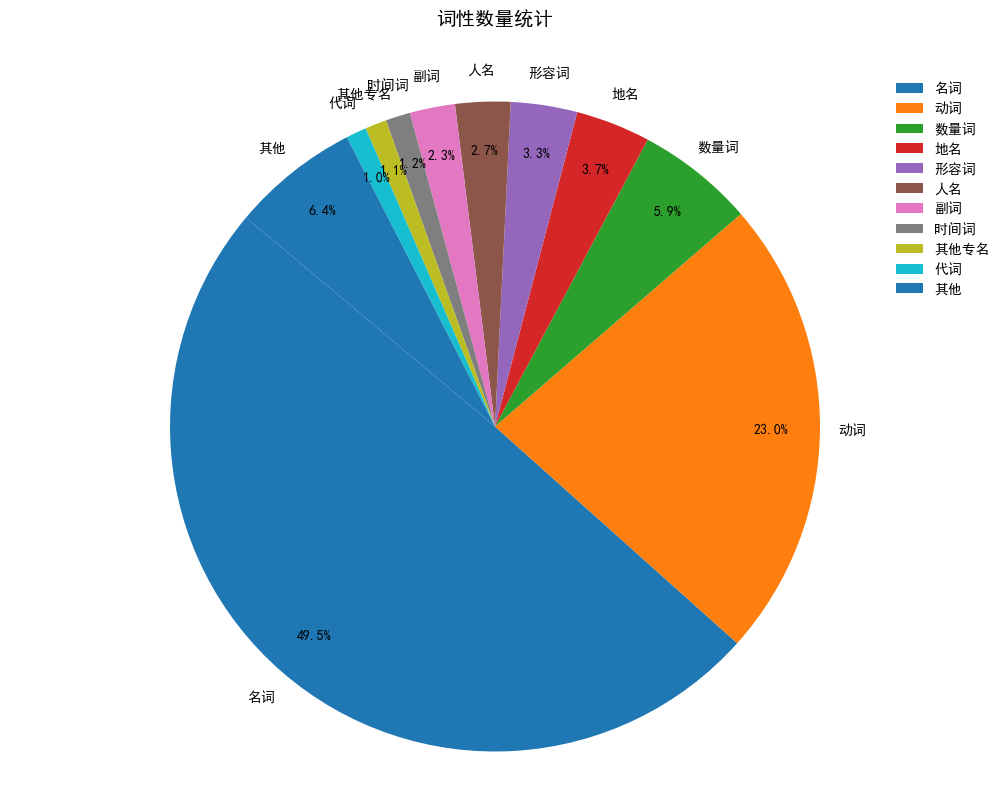

In [49]:
import jieba.posseg as pseg
from collections import defaultdict
import matplotlib.pyplot as plt

# 设置matplotlib的全局字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei'为黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题

# 读取预处理后的文本
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')

# 使用结巴分词进行词性标注
words = pseg.cut(text)

# 统计每种词性的出现次数
pos_count = defaultdict(int)
for word, flag in words:
    pos_count[flag] += 1

# 将词性标签替换为中文
pos_map = {
    'n': '名词',
    'v': '动词',
    'x': '生僻词',
    'a': '形容词',
    'b': '区别词',
    'i': '习用语',
    'j': '简称略语',
    'l': '习用语',
    's': '处所词',
    'nr': '人名',
    'ns': '地名',
    'nt': '机构团体',
    'nw': '专名',
    'nz': '其他专名',
    't': '时间词',
    'f': '方位词',
    'm': '数量词',
    'q': '量词',
    'd': '副词',
    'p': '介词',
    'c': '连词',
    'u': '助词',
    'e': '叹词',
    'y': '语气词',
    'r': '代词',
    'k': '前缀',
    'g': '后缀',
    'h': '前缀',
    'o': '拟声词',
    'ws': '外语',
    'unknown': '未知'
}

# 将词性计数字典中的键替换为中文
chinese_pos_count = {pos_map.get(k, '未知'): v for k, v in pos_count.items()}

# 按出现次数排序
sorted_pos_count = sorted(chinese_pos_count.items(), key=lambda x: x[1], reverse=True)

# 提取前10种词性及其数量，其余归为“其他”
top_n = 10
others = sum(count for pos, count in sorted_pos_count[top_n:])
labels = [pos for pos, count in sorted_pos_count[:top_n]] + ['其他']
sizes = [count for pos, count in sorted_pos_count[:top_n]] + [others]

# 绘制饼图
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10, 'color': 'black'},
    pctdistance=0.85
)

# 调整文本标签的位置和角度
for text in texts:
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')

# 添加标题
plt.title('词性数量统计', fontsize=14, y=1.05)

# 调整图例位置
plt.legend(
    loc='upper left',
    bbox_to_anchor=(0.9, 1.0),
    fontsize=10,
    edgecolor='none'
)

# 调整布局
plt.tight_layout()
plt.axis('equal')  # 确保饼图是圆形
plt.show()

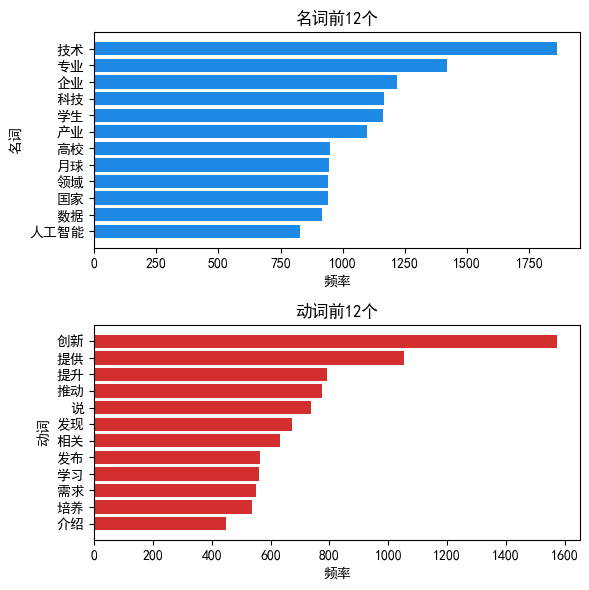

In [50]:
import jieba.posseg as pseg
from collections import defaultdict
import matplotlib.pyplot as plt

# 读取预处理后的文本
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')

# 使用结巴分词进行词性标注
words = pseg.cut(text)

# 统计名词和动词的出现次数
noun_count = defaultdict(int)
verb_count = defaultdict(int)
for word, flag in words:
    if flag == 'n':  # 名词
        noun_count[word] += 1
    elif flag == 'v':  # 动词
        verb_count[word] += 1

# 按出现次数排序并取前10个
top_nouns = sorted(noun_count.items(), key=lambda x: x[1], reverse=True)[:12]
top_verbs = sorted(verb_count.items(), key=lambda x: x[1], reverse=True)[:12]

# 绘制横的柱状图
plt.figure(figsize=(6, 6))

# 名词前10个
plt.subplot(2, 1, 1)
plt.barh([word[0] for word in top_nouns], [word[1] for word in top_nouns], color='#1E88E5')  # 设置为蓝色
plt.title('名词前12个')
plt.xlabel('频率')
plt.ylabel('名词')
plt.gca().invert_yaxis()  # 反转y轴，使频率高的在顶部

# 动词前10个
plt.subplot(2, 1, 2)
plt.barh([word[0] for word in top_verbs], [word[1] for word in top_verbs], color='#D32F2F')  # 设置为红色
plt.title('动词前12个')
plt.xlabel('频率')
plt.ylabel('动词')
plt.gca().invert_yaxis()  # 反转y轴，使频率高的在顶部

plt.tight_layout()
plt.show()

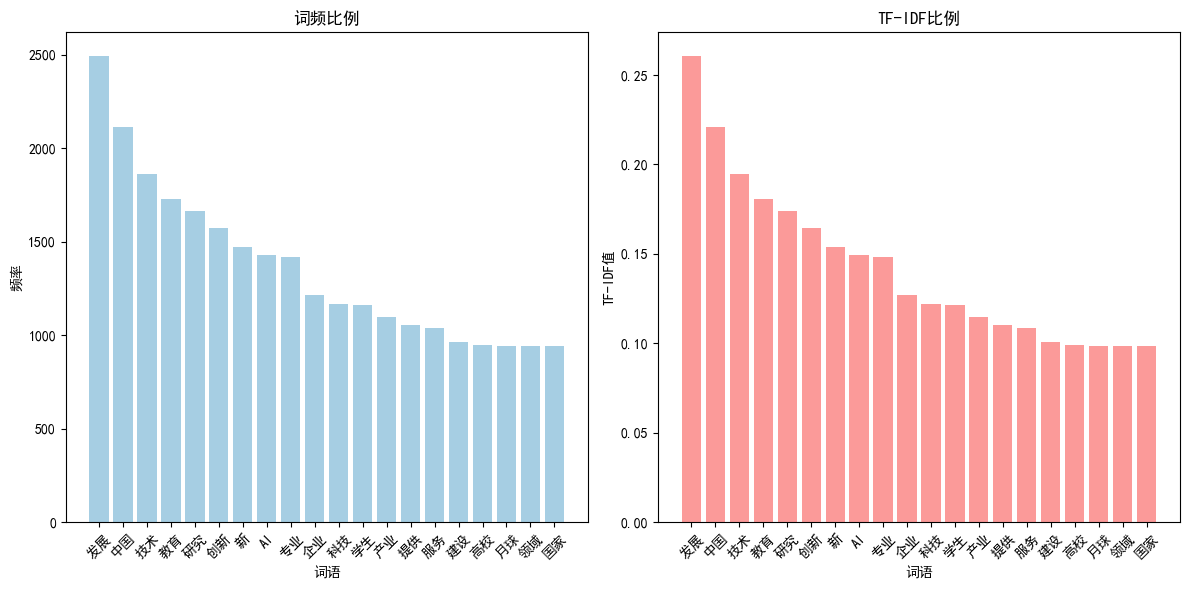

前20个词的词频比例和TF-IDF比例：
词语        词频        TF-IDF    
发展        2496      0.2608    
中国        2117      0.2212    
技术        1861      0.1945    
教育        1731      0.1809    
研究        1665      0.1740    
创新        1573      0.1644    
新         1473      0.1539    
AI        1431      0.1495    
专业        1419      0.1483    
企业        1217      0.1272    
科技        1166      0.1218    
学生        1161      0.1213    
产业        1096      0.1145    
提供        1053      0.1100    
服务        1039      0.1086    
建设        962       0.1005    
高校        950       0.0993    
月球        943       0.0985    
领域        942       0.0984    
国家        941       0.0983    


In [51]:
import jieba
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# 读取预处理后的文本
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')

# 使用结巴分词进行分词
words = jieba.lcut(text)

# 统计词频
word_freq = defaultdict(int)
for word in words:
    word_freq[word] += 1

# 计算TF-IDF
vectorizer = TfidfVectorizer(tokenizer=jieba.lcut, lowercase=False)
tfidf_matrix = vectorizer.fit_transform([text])
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()[0]

# 创建一个字典来存储词频和TF-IDF值
word_data = []
for word, freq in word_freq.items():
    if word in vectorizer.vocabulary_:
        tfidf = tfidf_values[vectorizer.vocabulary_[word]]
        word_data.append((word, freq, tfidf))

# 按TF-IDF值排序
word_data.sort(key=lambda x: x[2], reverse=True)

# 获取前20个词
top_words = word_data[:20]

# 准备数据以用于绘图
words = [item[0] for item in top_words]
freqs = [item[1] for item in top_words]
tfidf_scores = [item[2] for item in top_words]

# 绘制词频比例和TF-IDF比例的柱状图
plt.figure(figsize=(12, 6))

# 词频比例
plt.subplot(1, 2, 1)
plt.bar(words, freqs, color='#A6CEE3')  # 淡蓝色
plt.title('词频比例')
plt.xlabel('词语')
plt.ylabel('频率')
plt.xticks(rotation=45)

# TF-IDF比例
plt.subplot(1, 2, 2)
plt.bar(words, tfidf_scores, color='#FB9A99')  # 淡红色
plt.title('TF-IDF比例')
plt.xlabel('词语')
plt.ylabel('TF-IDF值')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 打印前20个词的词频比例和TF-IDF比例
print("前20个词的词频比例和TF-IDF比例：")
print("{:<10}{:<10}{:<10}".format('词语', '词频', 'TF-IDF'))
for word, freq, tfidf in top_words:
    print("{:<10}{:<10}{:<10.4f}".format(word, freq, tfidf))

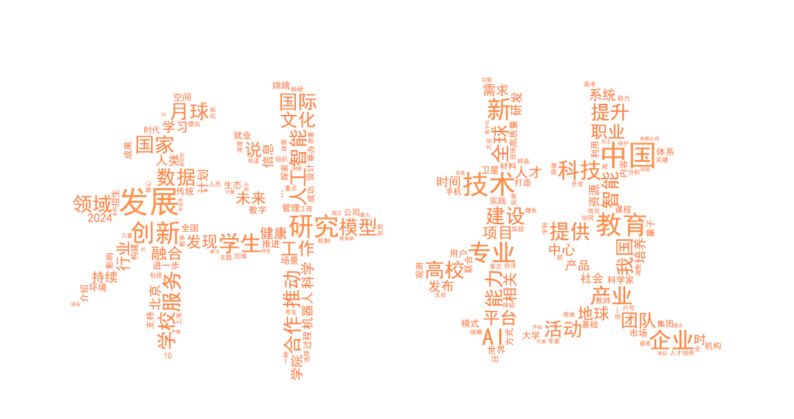

In [52]:
import jieba
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# 读取预处理后的文本
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')

# 使用结巴分词进行分词
words = jieba.lcut(text)

# 统计词频
word_freq = {}
for word in words:
    word_freq[word] = word_freq.get(word, 0) + 1

# 加载“科技”形状的掩膜图像
mask = np.array(Image.open('mask.png'))  # 请替换为你的掩膜图像路径

# 定义红色渐变暖色调的颜色函数
def red_warm_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 红色值保持为255，绿色值从100到200变化，蓝色值从50到100变化
    red = 255
    green = int(100 + 100 * (font_size / 100))
    blue = int(50 + 50 * (font_size / 100))
    return f"rgb({red}, {green}, {blue})"

# 生成词云
wc = WordCloud(
    font_path='simhei.ttf',  # 字体路径
    mask=mask,  # 掩膜
    background_color='white',  # 背景色
    max_words=200,  # 最大显示词数
    max_font_size=100,  # 最大字体大小
    random_state=42,  # 随机状态
    color_func=red_warm_color_func  # 颜色函数
)

# 生成词云图
wc.generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


## 共现矩阵

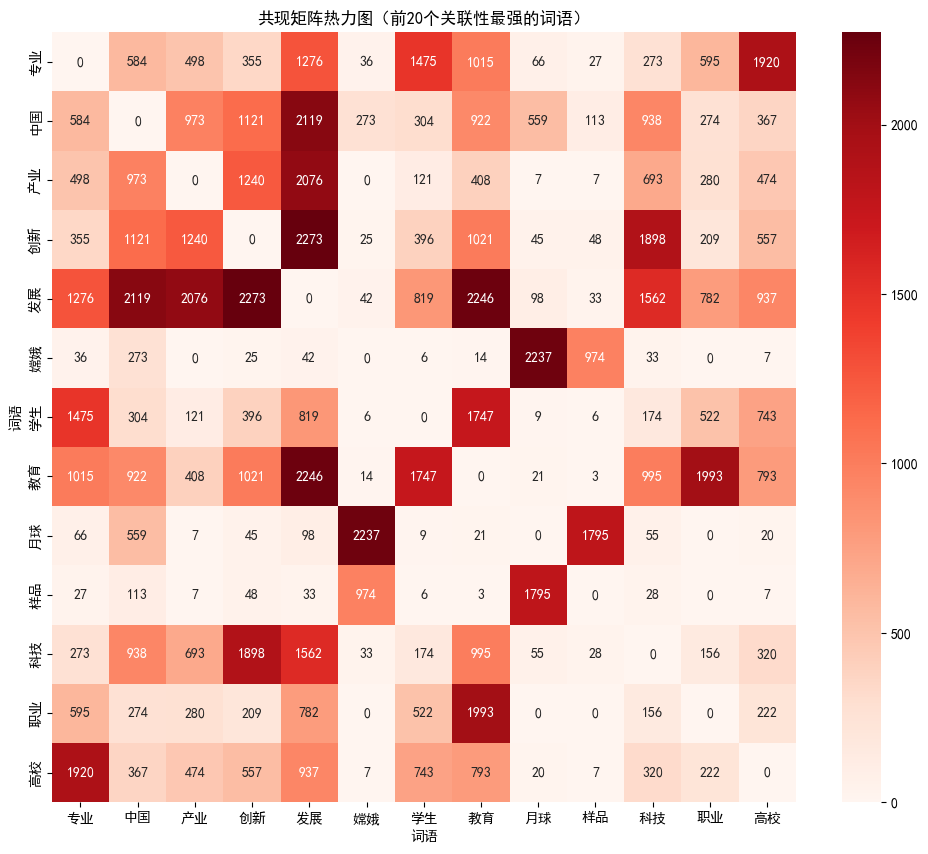

In [53]:
import jieba
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取预处理后的文本
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')

# 使用结巴分词进行分词
words = jieba.lcut(text)

# 定义共现窗口大小（这里以50个词为窗口）
window_size = 50

# 初始化共现矩阵
co_occurrence = defaultdict(lambda: defaultdict(int))

# 构建共现矩阵
for i in range(len(words)):
    for j in range(i - window_size, i + window_size + 1):
        if 0 <= j < len(words) and j != i:  # 排除自相关
            co_occurrence[words[i]][words[j]] += 1

# 将共现矩阵转换为二维数组
unique_words = sorted(set(words))
word_to_index = {word: idx for idx, word in enumerate(unique_words)}
co_occurrence_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)
for i, word1 in enumerate(unique_words):
    for j, word2 in enumerate(unique_words):
        if word1 != word2:  # 排除自相关
            co_occurrence_matrix[i][j] = co_occurrence[word1][word2]

# 找到共现次数最多的前20个词语对
top_words = []
for i in range(len(unique_words)):
    for j in range(len(unique_words)):
        if i != j and co_occurrence_matrix[i][j] > 0:
            top_words.append((unique_words[i], unique_words[j], co_occurrence_matrix[i][j]))
top_words.sort(key=lambda x: x[2], reverse=True)
top_words = top_words[:20]

# 提取前30个词语
top_word_set = set()
for word_pair in top_words:
    top_word_set.add(word_pair[0])
    top_word_set.add(word_pair[1])
top_word_list = sorted(top_word_set)

# 构建新的共现矩阵
top_word_to_index = {word: idx for idx, word in enumerate(top_word_list)}
top_co_occurrence_matrix = np.zeros((len(top_word_list), len(top_word_list)), dtype=int)
for i, word1 in enumerate(top_word_list):
    for j, word2 in enumerate(top_word_list):
        if word1 != word2:  # 排除自相关
            if word1 in co_occurrence and word2 in co_occurrence[word1]:
                top_co_occurrence_matrix[i][j] = co_occurrence[word1][word2]

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(top_co_occurrence_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=top_word_list, yticklabels=top_word_list)
plt.title("共现矩阵热力图（前20个关联性最强的词语）")
plt.xlabel("词语")
plt.ylabel("词语")
plt.show()

In [59]:
# -*- coding: utf-8 -*-
import itertools
import math
from collections import defaultdict
import networkx as nx
from pyvis.network import Network

# ================== 参数配置 ==================
TEXT_PATH = "processed_text.txt"      # 处理后的文本路径
OUTPUT_HTML = "network_graph.html"    # 输出网络图路径
WINDOW_SIZE = 10                       # 共现窗口大小(10或者20)
MIN_LIFT = 1.2                        # 最小提升度阈值
EDGE_SCALING = 0.8                    # 边粗细缩放系数
TOP_N = 50                            # 显示前N个强关联词对

# ================== 核心计算函数 ==================
def build_cooccurrence_network(text_path):
    """改进版共现网络构建函数"""
    # 读取预处理文本
    with open(text_path, 'r', encoding='utf-8') as f:
        processed_text = f.read().replace(' ', '').replace('\n', '')  # 移除空格和换行
    
    # 使用结巴分词
    words = jieba.lcut(processed_text)
    
    # 初始化数据结构
    co_occurrence = defaultdict(lambda: defaultdict(int))
    word_freq = defaultdict(int)
    total_words = len(words)
    window_size = 20  # 与示例代码保持一致

    # 双重循环构建共现矩阵
    for i in range(len(words)):
        current_word = words[i]
        word_freq[current_word] += 1
        
        # 定义有效窗口范围
        start = max(0, i - window_size)
        end = min(len(words), i + window_size + 1)
        
        # 窗口内共现统计
        for j in range(start, end):
            if j == i: continue  # 排除自相关
            context_word = words[j]
            co_occurrence[current_word][context_word] += 1

    # 计算提升度（添加平滑处理）
    lift_values = defaultdict(float)
    for word1 in co_occurrence:
        for word2 in co_occurrence[word1]:
            try:
                # 拉普拉斯平滑
                p_word1 = (word_freq[word1] + 1e-5) / (total_words + 1e-5)
                p_word2 = (word_freq[word2] + 1e-5) / (total_words + 1e-5)
                p_co_occur = (co_occurrence[word1][word2] + 1e-5) / (total_words + 1e-5)
                
                # 提升度计算
                lift = p_co_occur / (p_word1 * p_word2)
                lift_values[(word1, word2)] = lift
            except KeyError:
                continue

    return lift_values, word_freq

# ================== 可视化函数 ==================
def visualize_network(lift_dict, word_freq, output_html):
    """生成交互式网络图"""
    # 筛选显著关联词对（排除单节点）
    sorted_pairs = sorted(
        [((w1,w2),v) for (w1,w2),v in lift_dict.items() if w1 != w2],
        key=lambda x: x[1], 
        reverse=True
    )[:TOP_N]
    
    significant_pairs = {k: v for k, v in sorted_pairs if v >= MIN_LIFT}

    # 创建网络图
    G = nx.Graph()
    edge_weights = []

    # 添加节点和边（确保节点存在）
    node_set = set()
    for (word1, word2), lift in significant_pairs.items():
        node_set.update([word1, word2])
    
    # 先添加所有节点
    for node in node_set:
        G.add_node(node)
    
    # 再添加边（显式设置weight属性）
    for (word1, word2), lift in significant_pairs.items():
        G.add_edge(word1, word2, weight=lift)
        edge_weights.append(lift)

    # 转换为PyVis网络（携带边属性）
    net = Network(
        notebook=True,
        width="1200px",
        height="900px",
        bgcolor="#ffffff",
        font_color="#333333"
    )
    
    # 导入网络数据（携带边属性）
    for node in G.nodes():
        net.add_node(node)
        
    for u, v, data in G.edges(data=True):
        net.add_edge(u, v, value=data['weight'], title=f"Lift: {data['weight']:.2f}")

    # 设置物理布局参数
    net.force_atlas_2based(
        gravity=-80,
        central_gravity=0.01,
        spring_length=150,
        spring_strength=0.05,
        damping=0.6,
        overlap=0
    )

    # 可视化参数设置
    max_lift = max(edge_weights) if edge_weights else 1
    for node in net.nodes:
        # 节点大小与词频对数成正比
        freq = word_freq.get(node["id"], 1)
        node["size"] = 10 + 15 * math.log1p(freq)
        # ===== 修改颜色方案 =====
        node["color"] = {
            "background": "#FF6B6B",
            "border": "#8B0000",
            "highlight": {
                "background": "#FFA07A",
                "border": "#FF4500"
            }
        }
        node["font"] = {"size": 20, "color": "#4B0082"}  # 字体颜色改为靛蓝色

    for edge in net.edges:
        # 边宽归一化处理
        normalized_weight = edge["value"] / max_lift
        edge["width"] = 1 + normalized_weight * EDGE_SCALING * 5
        # ===== 修改颜色方案 =====
        edge["color"] = {
            "color": "rgba(255,215,0,0.7)",
            "highlight": "rgba(255,69,0,0.9)"
        }
        node["font"] = {"size": 20}

    # 生成HTML文件
    net.show_buttons(filter_=['physics'])
    net.show(output_html)

# ================== 主程序 ==================
if __name__ == "__main__":
    # 步骤1：计算提升度
    print("正在计算词项关联度...")
    lift_values, word_freq = build_cooccurrence_network(TEXT_PATH)
    
    # 步骤2：生成可视化
    print("正在生成网络图...")
    visualize_network(lift_values, word_freq, OUTPUT_HTML)
    
    print(f"可视化完成！请查看 {OUTPUT_HTML} 文件")
    print("提示：用浏览器打开HTML文件，可拖拽节点调整布局")

正在计算词项关联度...
正在生成网络图...
network_graph.html
可视化完成！请查看 network_graph.html 文件
提示：用浏览器打开HTML文件，可拖拽节点调整布局


## 词条相关性网络图

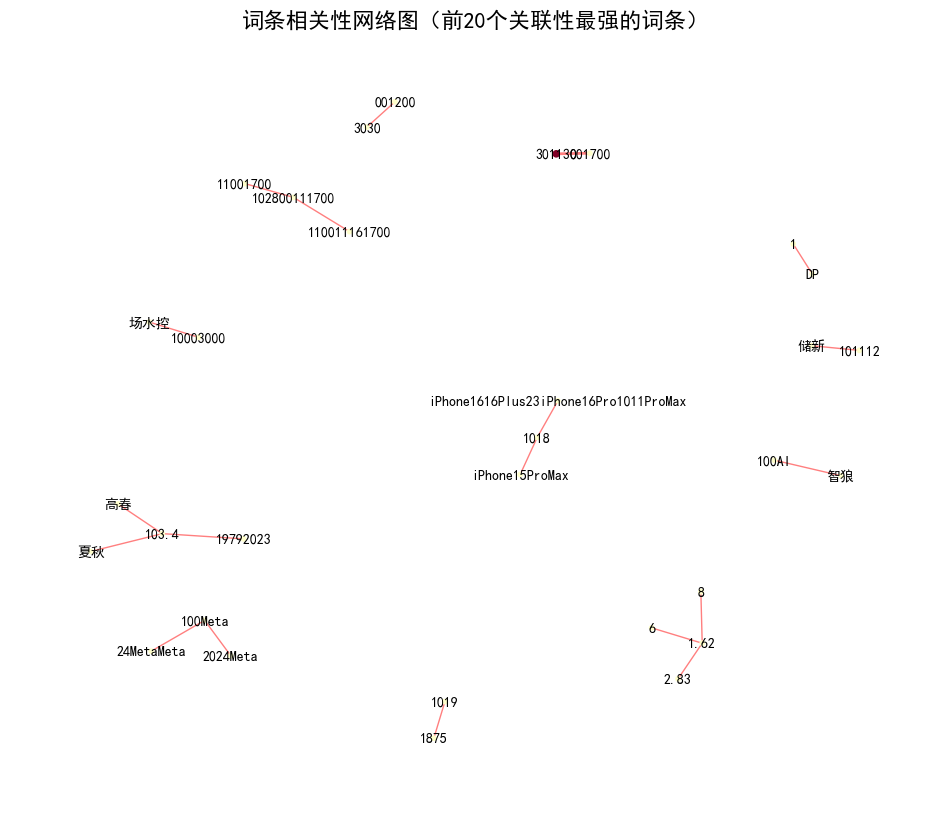

In [60]:
import jieba
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 读取预处理后的文本
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')

# 使用结巴分词进行分词
words = jieba.lcut(text)

# 定义共现窗口大小（这里以10个词为窗口）
window_size = 10

# 初始化共现矩阵
co_occurrence = defaultdict(lambda: defaultdict(int))

# 构建共现矩阵
for i in range(len(words)):
    for j in range(i - window_size, i + window_size + 1):
        if 0 <= j < len(words) and j != i:  # 排除自相关
            co_occurrence[words[i]][words[j]] += 1

# 将共现矩阵转换为二维数组
unique_words = sorted(set(words))
word_to_index = {word: idx for idx, word in enumerate(unique_words)}
co_occurrence_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)
for i, word1 in enumerate(unique_words):
    for j, word2 in enumerate(unique_words):
        if word1 != word2:  # 排除自相关
            co_occurrence_matrix[i][j] = co_occurrence[word1][word2]

# 计算支持度、置信度和提升度
total_transactions = len(text.split('。'))  # 假设以句号分隔句子作为事务
word_freq = defaultdict(int)
for word in words:
    word_freq[word] += 1

# 计算关联规则
association_rules = []
for i, word1 in enumerate(unique_words):
    for j, word2 in enumerate(unique_words):
        if i != j and co_occurrence_matrix[i][j] > 0:
            support = co_occurrence_matrix[i][j] / total_transactions
            confidence = co_occurrence_matrix[i][j] / word_freq[word1]
            lift = confidence / (word_freq[word2] / total_transactions)
            association_rules.append(((word1, word2), support, confidence, lift))

# 按提升度排序并取前20条规则
association_rules.sort(key=lambda x: x[3], reverse=True)
top_rules = association_rules[:20]

# 提取节点和边
nodes = set()
edges = []
for rule, support, confidence, lift in top_rules:
    word1, word2 = rule
    nodes.add(word1)
    nodes.add(word2)
    edges.append((word1, word2, confidence))  # 使用置信度作为边的权重

# 创建图
G = nx.Graph()
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 计算节点大小（基于词频）
node_size = defaultdict(int)
for word in words:
    node_size[word] += 1

# 绘制网络图
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3)  # 调整布局参数
node_sizes = [node_size[node] * 10 for node in G.nodes()]
node_colors = [node_size[node] for node in G.nodes()]  # 节点颜色基于词频

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.YlOrRd)

# 绘制边
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='red', alpha=0.5)

# 绘制标签
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# 添加标题
plt.title("词条相关性网络图（前20个关联性最强的词条）", fontsize=16)

# 显示图形
plt.axis('off')
plt.show()

## LDA

### 困惑度分析

主题数量: 2, 困惑度: -8.445560446930942
主题数量: 3, 困惑度: -8.525803319143645
主题数量: 4, 困惑度: -8.505665047490274
主题数量: 5, 困惑度: -8.5300665852906
主题数量: 6, 困惑度: -8.519504731429647
主题数量: 7, 困惑度: -8.51424641356599
主题数量: 8, 困惑度: -8.522592439719165
主题数量: 9, 困惑度: -8.523765937100078
主题数量: 10, 困惑度: -8.570462476535692
主题数量: 11, 困惑度: -8.5605370306064
主题数量: 12, 困惑度: -8.536653043717259
主题数量: 13, 困惑度: -8.541290520522734
主题数量: 14, 困惑度: -8.54441061151939
主题数量: 15, 困惑度: -8.64023542597316
主题数量: 16, 困惑度: -8.577536126228997
主题数量: 17, 困惑度: -8.639093377405327
主题数量: 18, 困惑度: -8.709986985576915
主题数量: 19, 困惑度: -8.63425597516792


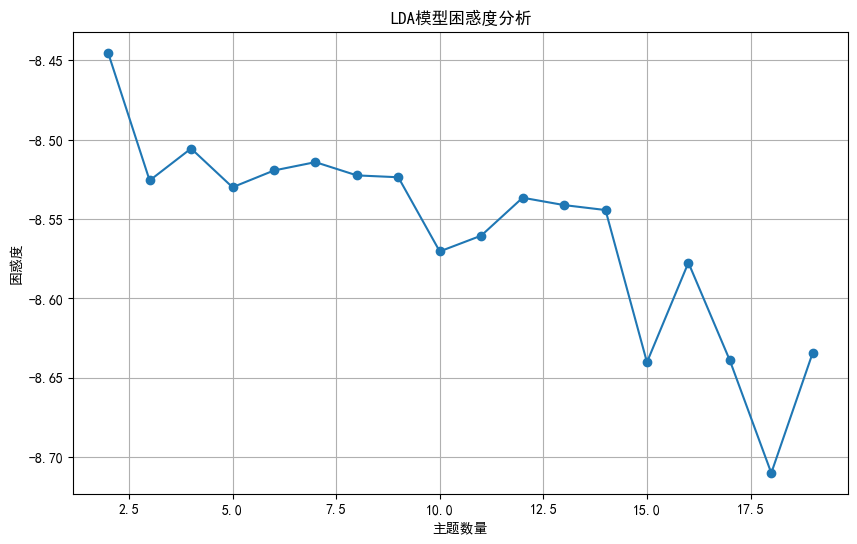

In [61]:
import jieba
from collections import defaultdict
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models

# 1. 中文分词
# 读取访谈文本
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')
# 使用结巴分词进行中文分词
jieba.setLogLevel('WARN')  # 关闭日志输出
words = jieba.lcut(text)

# 2. 构建词典和语料
# 构建词典
dictionary = corpora.Dictionary([words])

# 构建语料
corpus = [dictionary.doc2bow(words)]
# 准备测试数据（这里使用相同的语料作为测试数据）
test_corpus = corpus

# 定义主题数量范围
num_topics_range = range(2, 20)

# 记录不同主题数量的困惑度
perplexities = []

for num_topics in num_topics_range:
    # 训练LDA模型
    lda_model = gensim.models.LdaModel(
        corpus,
        num_topics=num_topics,
        id2word=dictionary,
        passes=10,
        alpha='auto',
        eta='auto'
    )
    
    # 计算困惑度
    perplexity = lda_model.log_perplexity(test_corpus)
    perplexities.append(perplexity)
    print(f"主题数量: {num_topics}, 困惑度: {perplexity}")

# 绘制困惑度随主题数量变化的曲线
import matplotlib.pyplot as plt
    
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, perplexities, marker='o')
plt.xlabel('主题数量')
plt.ylabel('困惑度')
plt.title('LDA模型困惑度分析')
plt.grid(True)
plt.show()

### 训练主题

In [65]:
import jieba
from collections import defaultdict
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models

# 1. 中文分词
# 读取访谈文本
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')
# 使用结巴分词进行中文分词
jieba.setLogLevel('WARN')  # 关闭日志输出
words = jieba.lcut(text)

# 2. 构建词典和语料
# 构建词典
dictionary = corpora.Dictionary([words])

# 构建语料
corpus = [dictionary.doc2bow(words)]

# 3. 训练LDA模型
# 设置主题数量
num_topics = 10

# 训练LDA模型
lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,
    alpha='auto',
    eta='auto'
)

# 4. 输出主题分布
# 打印每个主题的关键词
for topic in lda_model.print_topics():
    print(topic)

# 5. 可视化主题分布
# 准备可视化数据
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# 保存可视化结果到HTML文件
pyLDAvis.save_html(vis_data, 'lda_visualization.html')

# 打印可视化结果路径
print("LDA可视化结果已保存到 lda_visualization.html 文件中")

(0, '0.002*"教育" + 0.002*"发展" + 0.002*"研究" + 0.002*"中国" + 0.001*"专业" + 0.001*"AI" + 0.001*"技术" + 0.001*"创新" + 0.001*"企业" + 0.001*"服务"')
(1, '0.001*"发展" + 0.001*"中国" + 0.001*"教育" + 0.001*"创新" + 0.001*"技术" + 0.001*"新" + 0.001*"AI" + 0.001*"研究" + 0.001*"学生" + 0.001*"企业"')
(2, '0.001*"发展" + 0.001*"中国" + 0.001*"技术" + 0.001*"研究" + 0.001*"新" + 0.001*"专业" + 0.001*"AI" + 0.001*"教育" + 0.000*"创新" + 0.000*"领域"')
(3, '0.001*"发展" + 0.001*"技术" + 0.001*"研究" + 0.001*"创新" + 0.001*"教育" + 0.001*"中国" + 0.001*"企业" + 0.001*"提供" + 0.001*"新" + 0.001*"学生"')
(4, '0.007*"发展" + 0.006*"中国" + 0.005*"技术" + 0.005*"教育" + 0.005*"研究" + 0.005*"创新" + 0.004*"新" + 0.004*"AI" + 0.004*"专业" + 0.004*"企业"')
(5, '0.002*"发展" + 0.002*"教育" + 0.002*"中国" + 0.002*"技术" + 0.001*"专业" + 0.001*"创新" + 0.001*"新" + 0.001*"企业" + 0.001*"数据" + 0.001*"科技"')
(6, '0.001*"发展" + 0.001*"技术" + 0.001*"中国" + 0.001*"专业" + 0.001*"创新" + 0.001*"研究" + 0.001*"教育" + 0.001*"新" + 0.001*"科技" + 0.001*"学生"')
(7, '0.001*"发展" + 0.001*"技术" + 0.001*"研究" + 0.001*"中国" + 0.00

D:\IDEEnviornment\Python\py310\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


LDA可视化结果已保存到 lda_visualization.html 文件中


## 可视化任务

### 词云时间轴主题变化

In [67]:
all_news

[{'title': '新型合成小分子可“精准杀伤”癌细胞',
  'url': 'http://www.ce.cn/xwzx/kj/202505/14/t20250514_39359294.shtml',
  'time': '2025-05-14 14:14:00'},
 {'title': '京东工业全面参与山东“十链百群万企”融链固链行动',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358106.shtml',
  'time': '2025-05-12 13:56:00'},
 {'title': '海尔集团与青岛国信集团达成战略合作，探索跨界融合创新示范路径',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358105.shtml',
  'time': '2025-05-12 13:55:00'},
 {'title': '东航将新开多条欧洲航线',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358104.shtml',
  'time': '2025-05-12 13:55:00'},
 {'title': '欢乐谷主题公园多维场景促进文旅消费升温',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358103.shtml',
  'time': '2025-05-12 13:54:00'},
 {'title': '健身人群一天吃几个鸡蛋最好？',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358102.shtml',
  'time': '2025-05-12 13:48:00'},
 {'title': '求真丨动物异常活动能预测地震吗？',
  'url': 'http://www.ce.cn/xwzx/kj/202505/12/t20250512_39358075.shtml',
  'time': '2025-05-12 11:22:00'},
 {'title': '合成生物学能将火星打

### 归类

In [68]:
import jieba
from gensim import corpora

# 假设已经准备好以下变量
# lda_model: 训练好的LDA模型
# dictionary: LDA模型使用的词典（gensim.corpora.Dictionary）
# all_news: 新闻数据列表

def preprocess(text):
    # 简单分词，可根据需要完善
    return [w for w in jieba.lcut(text) if len(w.strip()) > 1]

# 为每篇文章标题生成主题标签
for news in all_news:
    title = news['title']
    tokens = preprocess(title)
    bow = dictionary.doc2bow(tokens)
    topic_probs = lda_model.get_document_topics(bow)  # 获取主题分布 [(topic_id, prob), ...]
    # 找概率最大的主题
    if topic_probs:
        top_topic = max(topic_probs, key=lambda x: x[1])[0]
    else:
        top_topic = -1  # 无主题或异常数据
    news['topic'] = top_topic


In [70]:
from collections import defaultdict
import pandas as pd

# 统计每个月每个主题的文章数量
topic_time_counts = defaultdict(lambda: defaultdict(int))  # {time: {topic: count}}

for news in all_news:
    # 提取“年月”作为时间标签，例如 '2025-05'
    time_key = news['time'][:7]
    topic = news['topic']
    topic_time_counts[time_key][topic] += 1

# 转换为 DataFrame，行是时间，列是主题
df_counts = pd.DataFrame(topic_time_counts).T.fillna(0).sort_index()
df_counts.index.name = 'time'
df_counts.columns.name = 'topic'

print(df_counts.head())


topic     4
time       
2024-04  37
2024-05  97
2024-06  82
2024-07  73
2024-08  68


2024-04 主题1 无数据，跳过
2024-05 主题1 无数据，跳过
2024-06 主题1 无数据，跳过
2024-07 主题1 无数据，跳过
2024-08 主题1 无数据，跳过
2024-09 主题1 无数据，跳过
2024-10 主题1 无数据，跳过
2024-11 主题1 无数据，跳过
2024-12 主题1 无数据，跳过
2025-01 主题1 无数据，跳过
2025-02 主题1 无数据，跳过
2025-03 主题1 无数据，跳过
2025-04 主题1 无数据，跳过
2025-05 主题1 无数据，跳过
2025-07 主题1 无数据，跳过


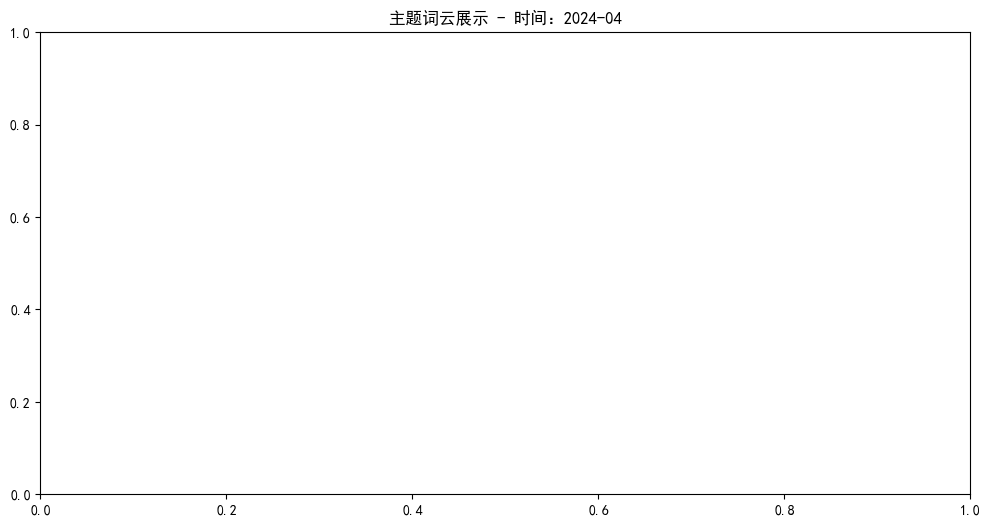

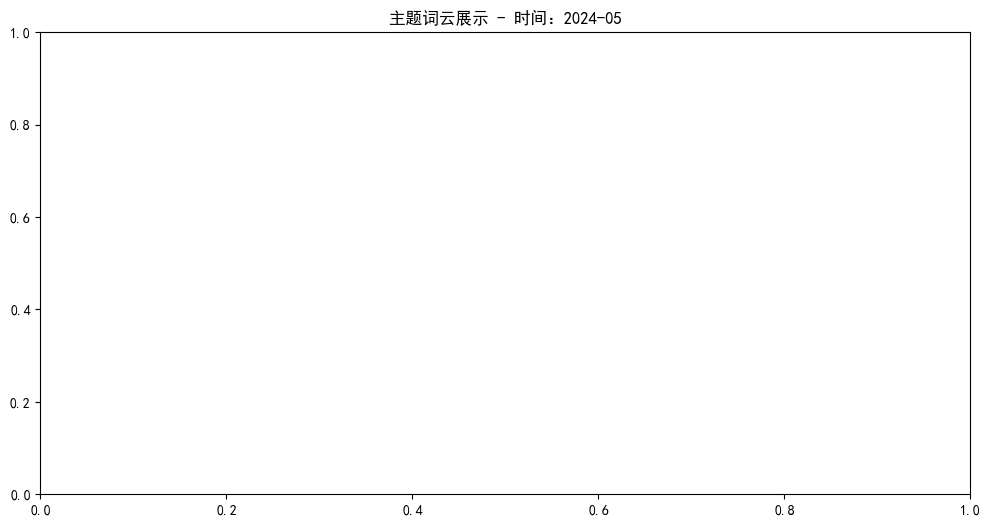

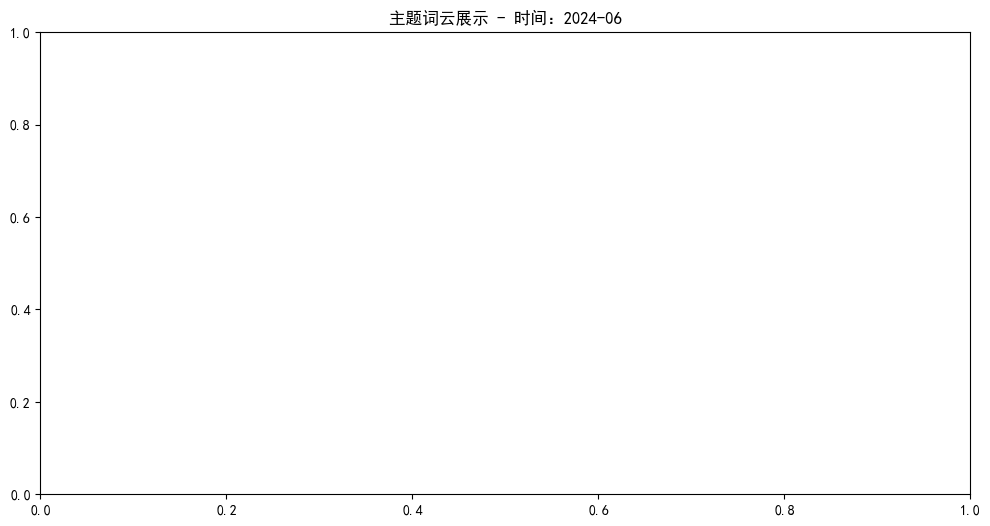

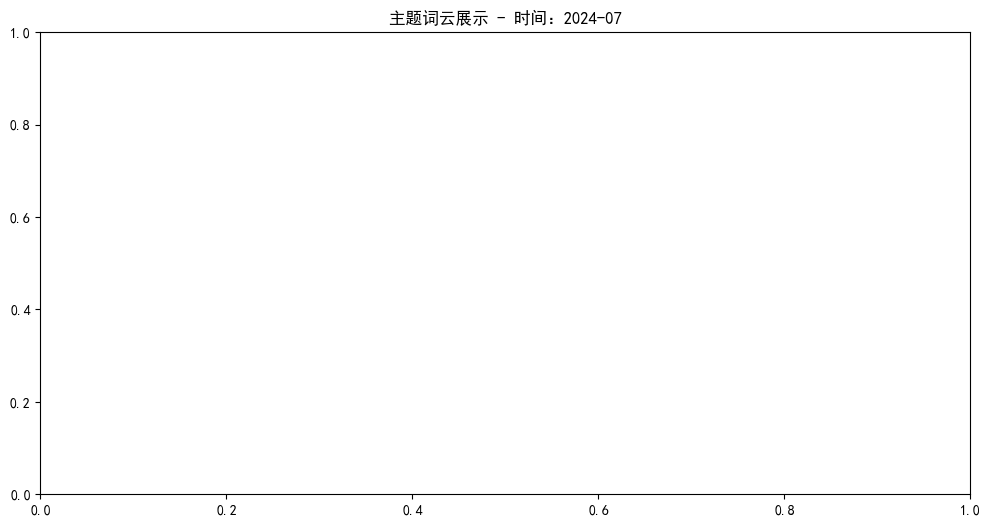

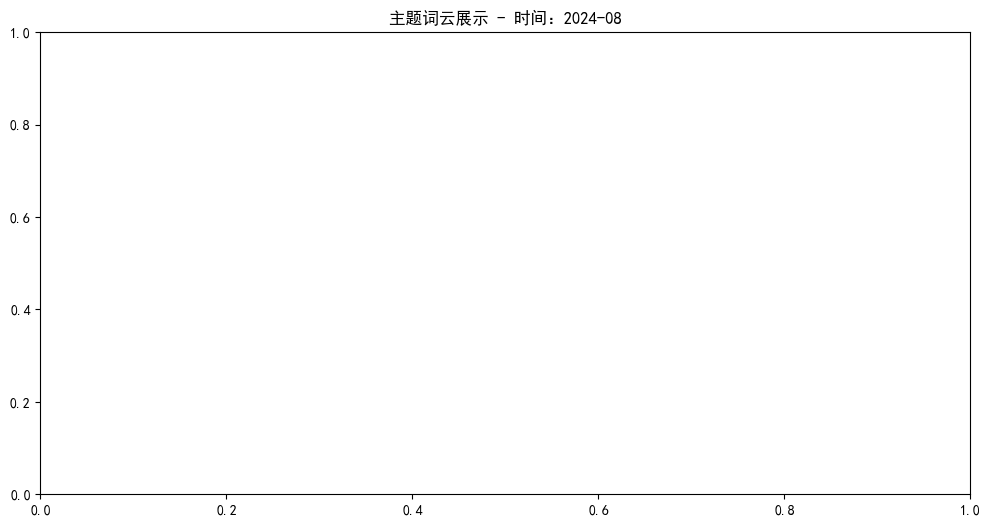

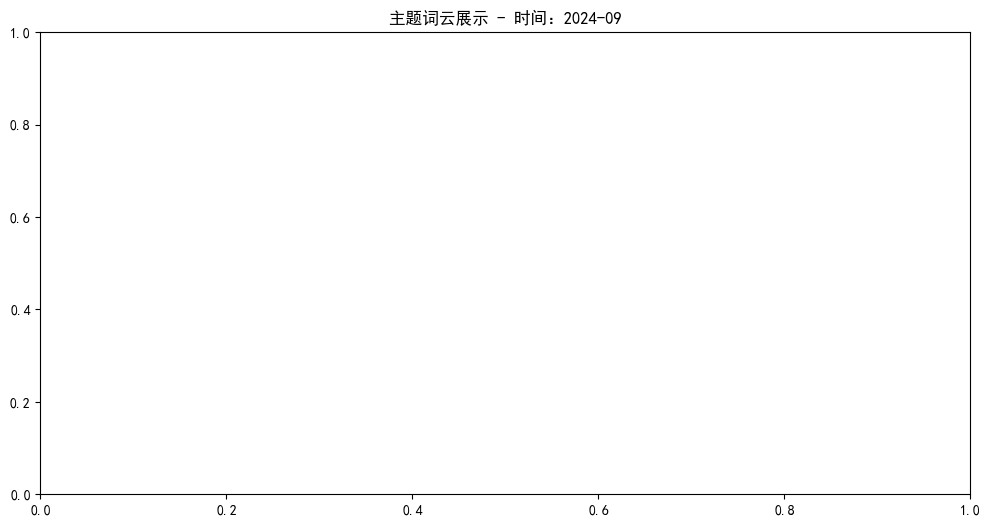

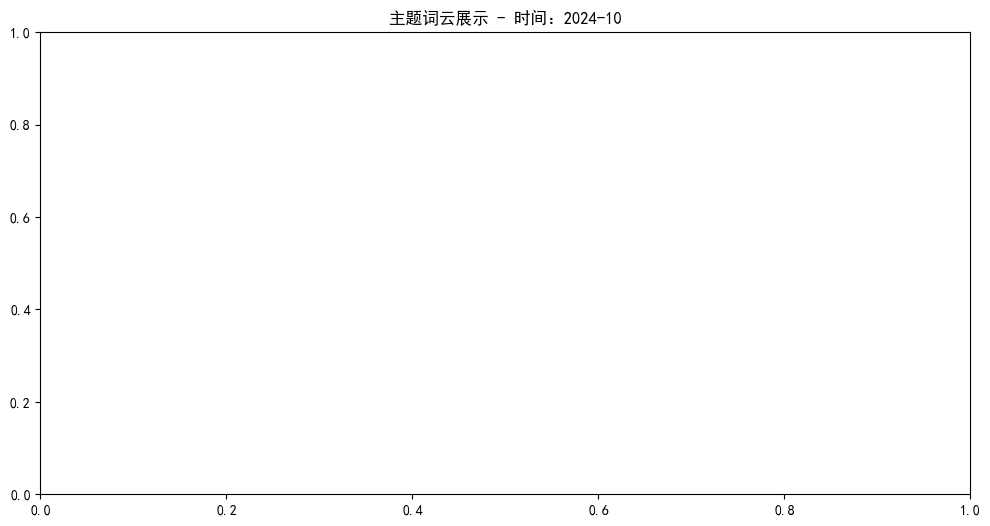

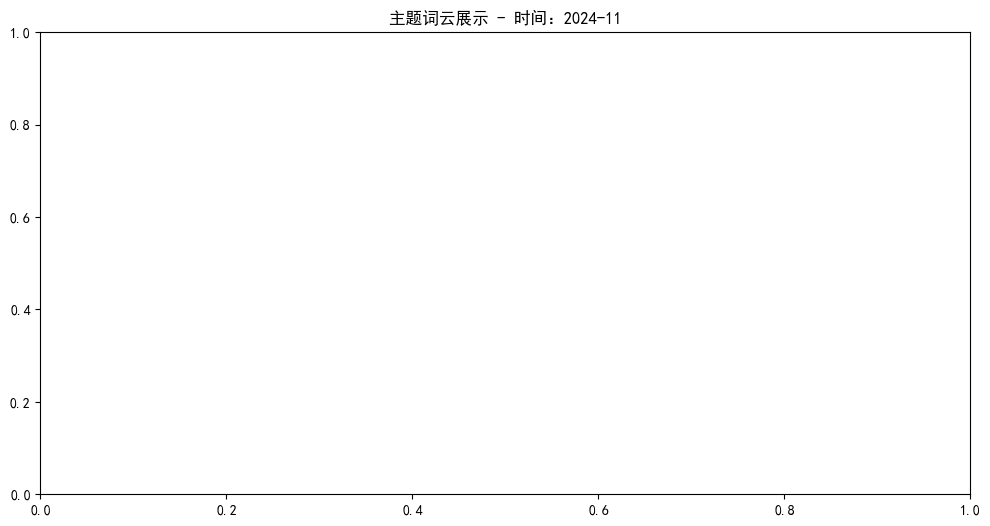

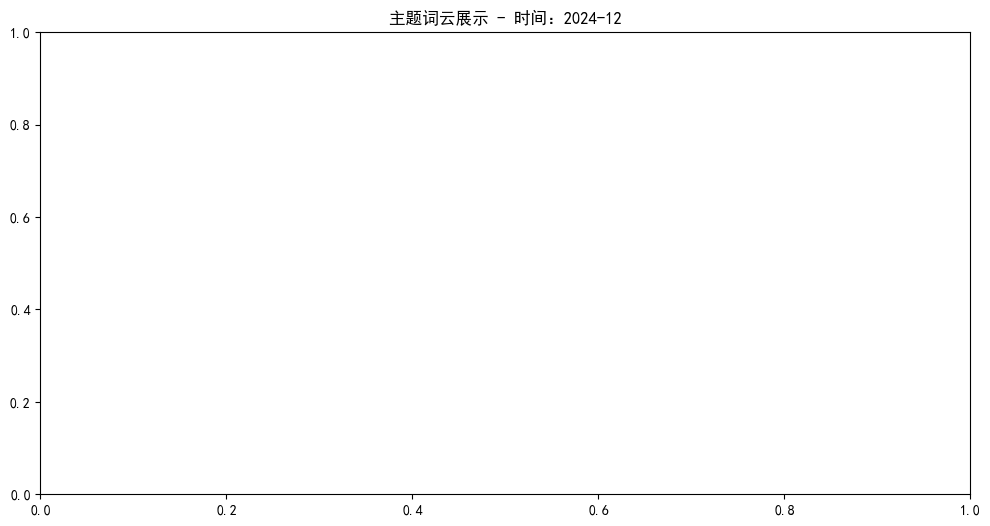

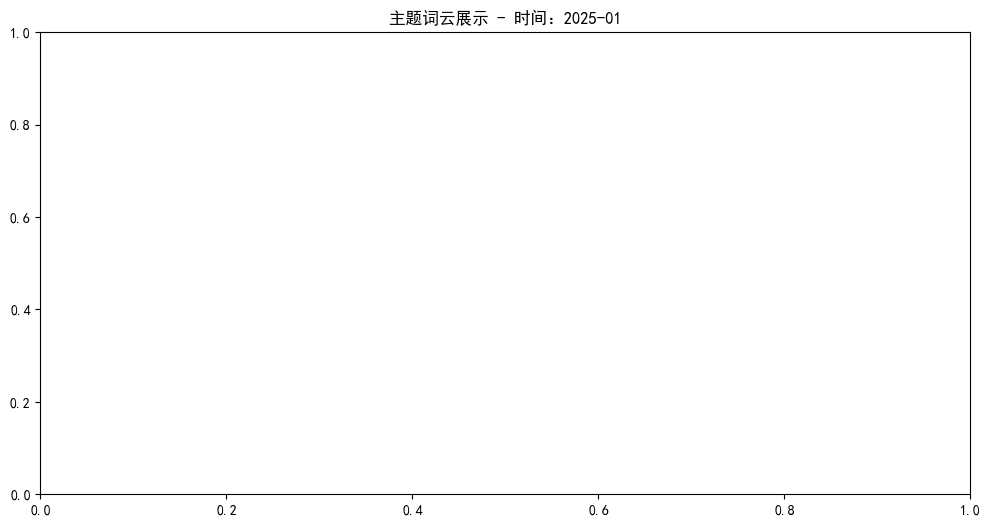

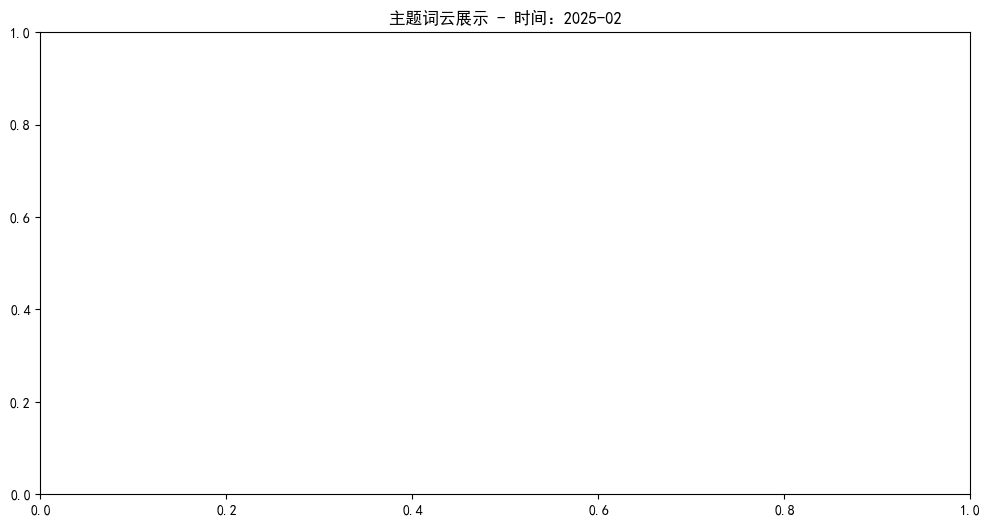

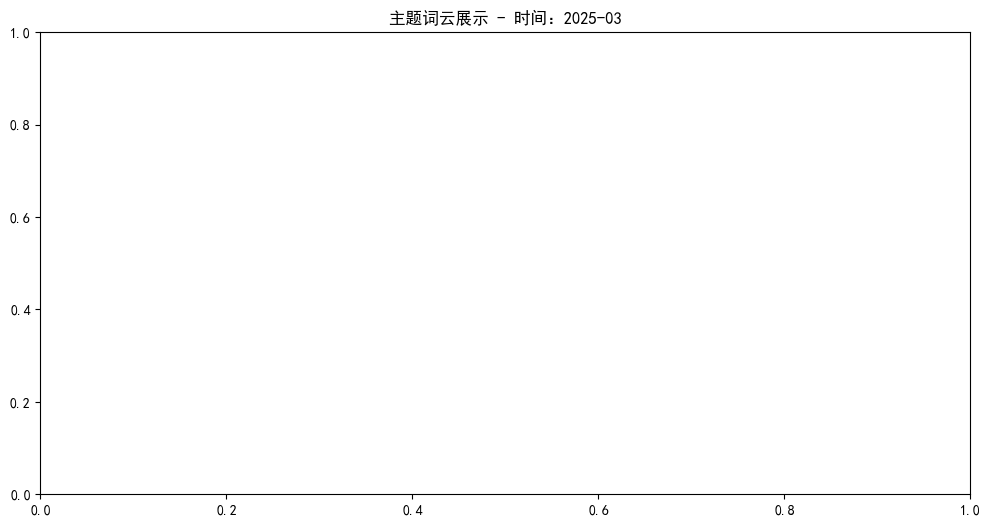

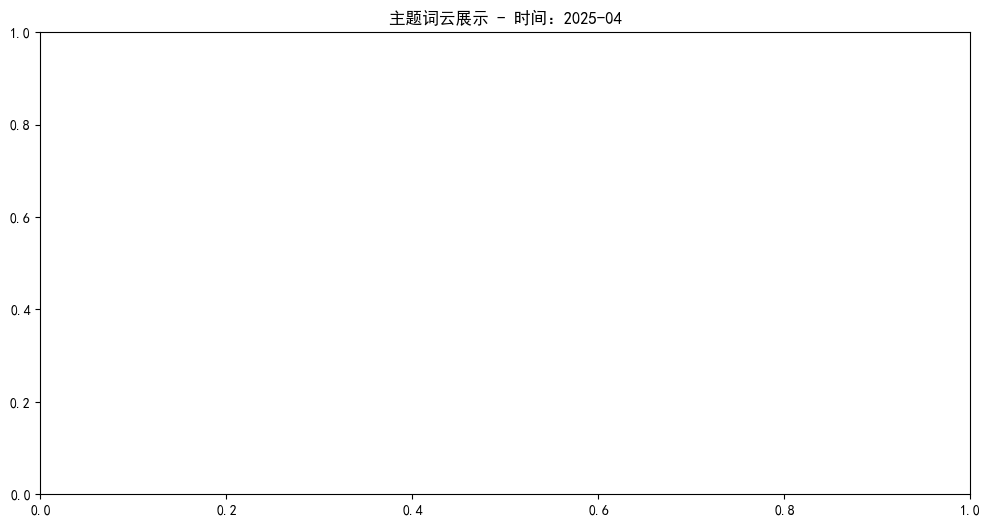

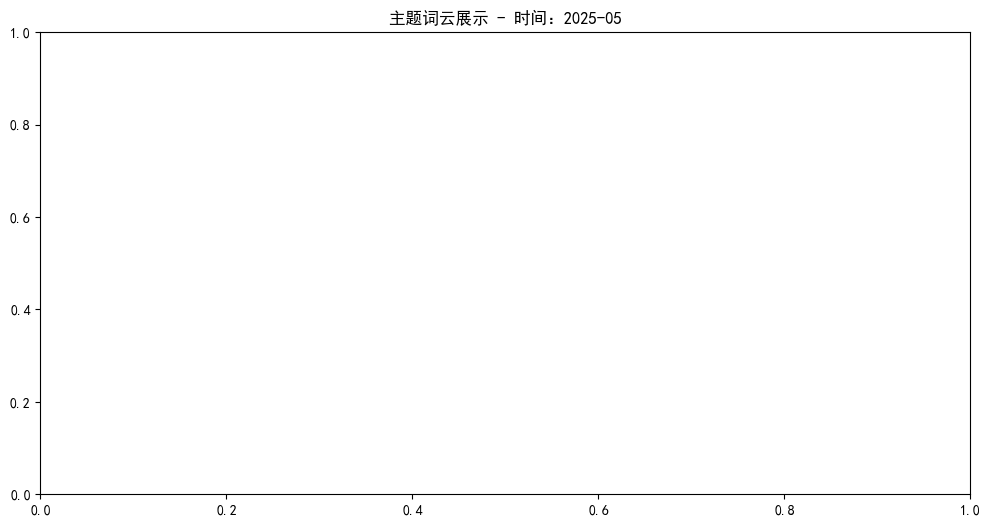

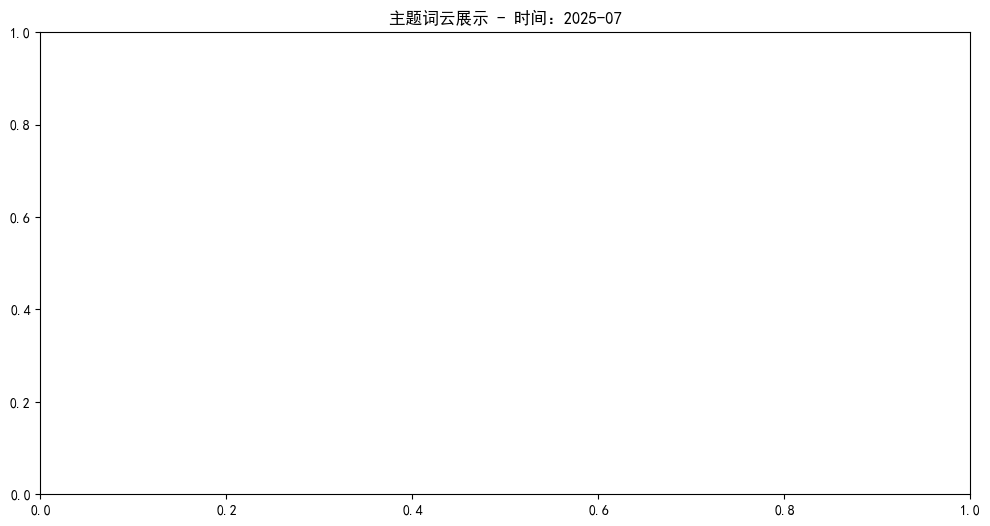

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import numpy as np

# 准备主题关键词字典
topic_keywords = dict()
num_words = 20
for topic_id in range(lda_model.num_topics):
    terms = lda_model.show_topic(topic_id, topn=num_words)
    # 转换成 dict：词->权重
    topic_keywords[topic_id] = {term: weight for term, weight in terms}

# 提取各时间的主题热度，选某个主题动态画词云
for time_key in df_counts.index:
    plt.figure(figsize=(12, 6))
    title = f"主题词云展示 - 时间：{time_key}"
    plt.title(title)
    # 选主题，这里示例选主题0，也可以循环或交互选择
    topic_id = 1

    # 构建词云词频，词频可以结合主题词权重和该时间该主题热度加权
    weight = df_counts.loc[time_key, topic_id] if topic_id in df_counts.columns else 0
    if weight == 0:
        print(f"{time_key} 主题{topic_id} 无数据，跳过")
        continue

    freqs = {word: val * weight for word, val in topic_keywords[topic_id].items()}

    wc = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=400)
    wc.generate_from_frequencies(freqs)

    plt.imshow(wc)
    plt.axis('off')
    plt.show()

    # 延时模拟动态
    time.sleep(2)
    plt.close()


### 堆叠面积图

### 交互功能主题词跳链接

## 情感分类

In [62]:
import jieba
from collections import defaultdict

# 加载情感词典
with open('ntusd-positive.txt', 'r', encoding='utf-8') as f:
    positive_words = set(f.read().split())

with open('ntusd-negative.txt', 'r', encoding='utf-8') as f:
    negative_words = set(f.read().split())

with open('not_words.txt', 'r', encoding='gbk') as f:
    not_words = set(f.read().split())

# 对预处理后的文本进行情感分析
with open('processed_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# 移除文本中的多余空格和换行
text = text.replace(' ', '').replace('\n', '')

# 使用结巴分词进行分词
words = jieba.lcut(text)

# 初始化情感分数
positive_score = 0
negative_score = 0

# 遍历每个词，计算情感分数
for word in words:
    # 判断是否为否定词
    if word in not_words:
        continue
    # 判断是否为积极词
    if word in positive_words:
        positive_score += 1
    # 判断是否为消极词
    elif word in negative_words:
        negative_score += 1

# 计算情感倾向
emotion_score = positive_score - negative_score

# 判断情感极性
if emotion_score > 0:
    emotion_polarity = '积极'
elif emotion_score < 0:
    emotion_polarity = '消极'
else:
    emotion_polarity = '中性'

# 输出结果
print(f'积极情感分数：{positive_score}')
print(f'消极情感分数：{negative_score}')
print(f'情感倾向分数：{emotion_score}')
print(f'情感极性：{emotion_polarity}')

积极情感分数：25405
消极情感分数：7288
情感倾向分数：18117
情感极性：积极


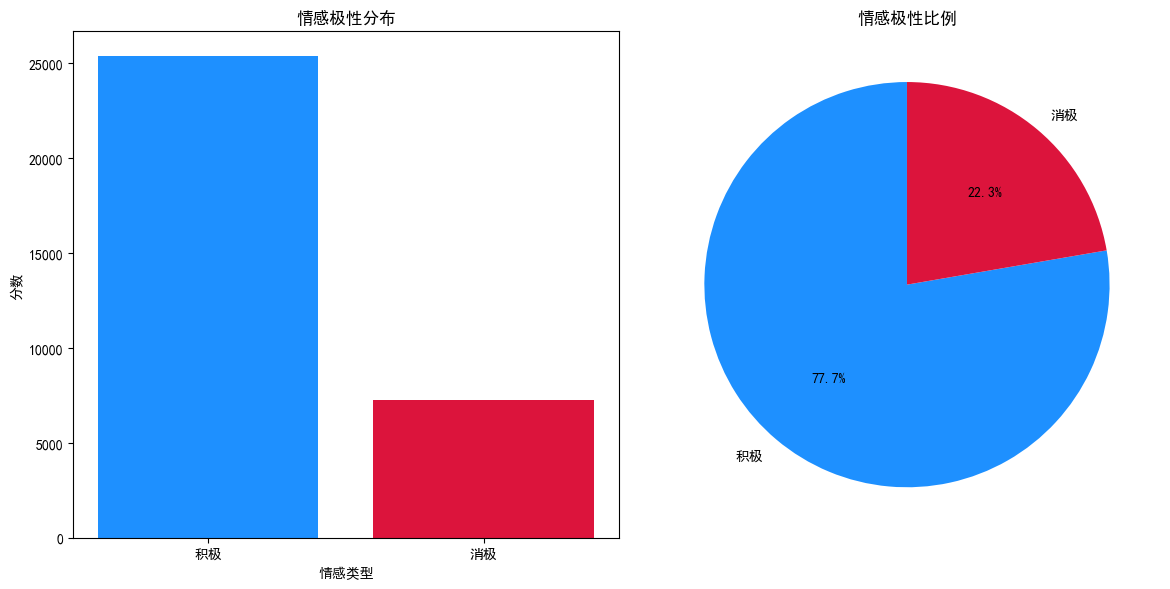

情感极性：积极


In [66]:
import matplotlib.pyplot as plt

# 情感分析结果
positive_score = 25405  # 积极情感分数
negative_score = 7288   # 消极情感分数
emotion_polarity = '积极'  # 情感极性

# 创建数据
data = {
    '积极': positive_score,
    '消极': negative_score
}

# 创建情感极性标签
labels = list(data.keys())
sizes = list(data.values())

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建图表
plt.figure(figsize=(12, 6))

# 绘制情感极性分布柱状图
plt.subplot(1, 2, 1)
plt.bar(labels, sizes, color=['#1E90FF', '#DC143C'])  # 红蓝配色
plt.title('情感极性分布')
plt.xlabel('情感类型')
plt.ylabel('分数')

# 绘制情感极性比例饼图
plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#1E90FF', '#DC143C'])
plt.title('情感极性比例')

# 调整布局
plt.tight_layout()
plt.show()

# 输出情感分类结果
print(f'情感极性：{emotion_polarity}')